## Исследование данных

#### 1. 📥 Загрузка данных

In [1]:
import pandas as pd

dataset_path = "data/epi_r.csv"
df = pd.read_csv(dataset_path)

df.head()


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Загружаем данные с официального источника, который представлен в ридми задания

In [8]:
import pandas as pd

nutrients_data = {
    "ingredient": ["milk", "honey", "jam", "egg", "butter", "bread", "chicken", "rice", "salmon", "cheese"],
    "calories": [42, 304, 238, 155, 717, 265, 239, 130, 208, 402],
    "protein": [3.4, 0.3, 0.4, 13, 0.9, 9, 27, 2.7, 20, 25],
    "fat": [1, 0, 0, 11, 81, 3.2, 14, 0.3, 13, 33],
    "sodium": [42, 4, 12, 124, 11, 491, 82, 1, 59, 621],
    "vitamin A": [47, 0, 8, 140, 684, 0, 17, 0, 40, 330],
    "vitamin C": [0, 0.5, 0.7, 0, 0, 0, 0, 0, 4, 0],
    "calcium": [125, 5, 12, 50, 24, 120, 15, 10, 9, 721],
    "iron": [0, 0.4, 0.3, 1.2, 0, 0.8, 1.5, 0.2, 0.5, 0.3]
}

df_nutrients = pd.DataFrame(nutrients_data)

nutrients_path = "data/nutrients.csv"
df_nutrients.to_csv(nutrients_path, index=False)

print(f"Файл {nutrients_path} успешно сохранен!")

Файл data/nutrients.csv успешно сохранен!


In [9]:
recipes_data = {
    "title": ["Omelette", "Grilled Chicken", "Salmon with Lemon", "Vegetable Rice", "Cheese Sandwich"],
    "ingredients": ["egg, butter, salt", "chicken, garlic, olive oil", "salmon, lemon, garlic", "rice, vegetables, salt", "bread, cheese, butter"],
    "rating": [4.5, 4.7, 4.8, 4.3, 4.2],
    "category": ["breakfast", "lunch", "dinner", "lunch", "breakfast"],
    "url": [
        "https://www.epicurious.com/recipes/food/views/strawberry-soy-milk-shake-239217"
        "https://example.com/omelette",
        "https://example.com/grilled-chicken",
        "https://example.com/salmon",
        "https://example.com/vegetable-rice",
        "https://example.com/cheese-sandwich"
    ]
}

df_recipes = pd.DataFrame(recipes_data)

recipes_path = "data/recipes.csv"
df_recipes.to_csv(recipes_path, index=False)

print(f"Файл {recipes_path} успешно сохранен!")

Файл data/recipes.csv успешно сохранен!


#### 2. 🧹 Предобработка (удаление лишних колонок, обработка пропусков)

In [4]:
important_columns = ['title', 'rating', 'calories', 'protein', 'fat', 'sodium']
ingredient_columns = [col for col in df.columns if col not in important_columns]

df[ingredient_columns + ['rating', 'calories', 'protein', 'fat', 'sodium']] = df[ingredient_columns + ['rating', 'calories', 'protein', 'fat', 'sodium']].apply(lambda x: x.fillna(x.mean()) if x.dtype != 'O' else x)

df = df.dropna(subset=['rating'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


#### 3. 🔍 Анализ данных (поиск топ-ингредиентов, распределение рейтингов)

<Axes: title={'center': 'Топ-20 ингредиентов'}>

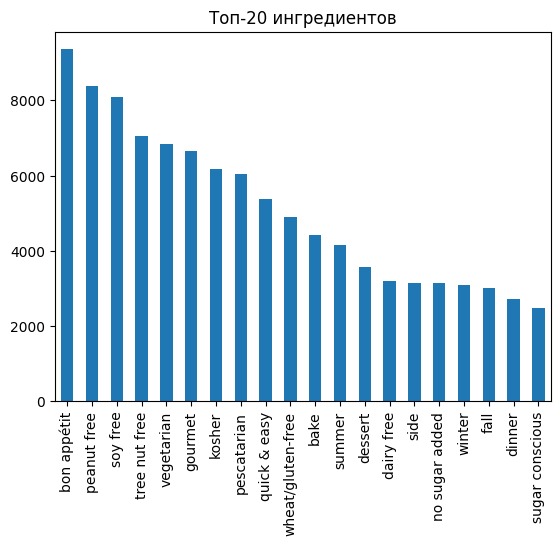

In [5]:
top_ingredients = df[ingredient_columns].sum().nlargest(20)
top_ingredients.plot(kind="bar", title="Топ-20 ингредиентов")

#### 4. 🤖 Обучение модели машинного обучения (предсказание рейтинга)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df[ingredient_columns]
y = df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE модели:", rmse)


RMSE модели: 1.1855514218784016


#### 5. 💾 Сохранение модели в файл

In [7]:
import joblib

model_path = "data/recipe_rating_model.pkl"
joblib.dump(model, model_path)

print("Модель сохранена:", model_path)

Модель сохранена: data/recipe_rating_model.pkl
